## Analyse exploratoire des données

In [138]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LassoCV

In [74]:
train_data = pd.read_csv('../data/raw/train.csv')
super_train_data = pd.read_csv('../data/processed/superclasses.csv')

In [75]:
# Afficher les premières lignes
train_data.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

In [9]:
# Statistiques descriptives
train_data.describe()

id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

### Analyse des Valeurs Manquantes

In [10]:
# Vérifier les valeurs manquantes
train_data.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

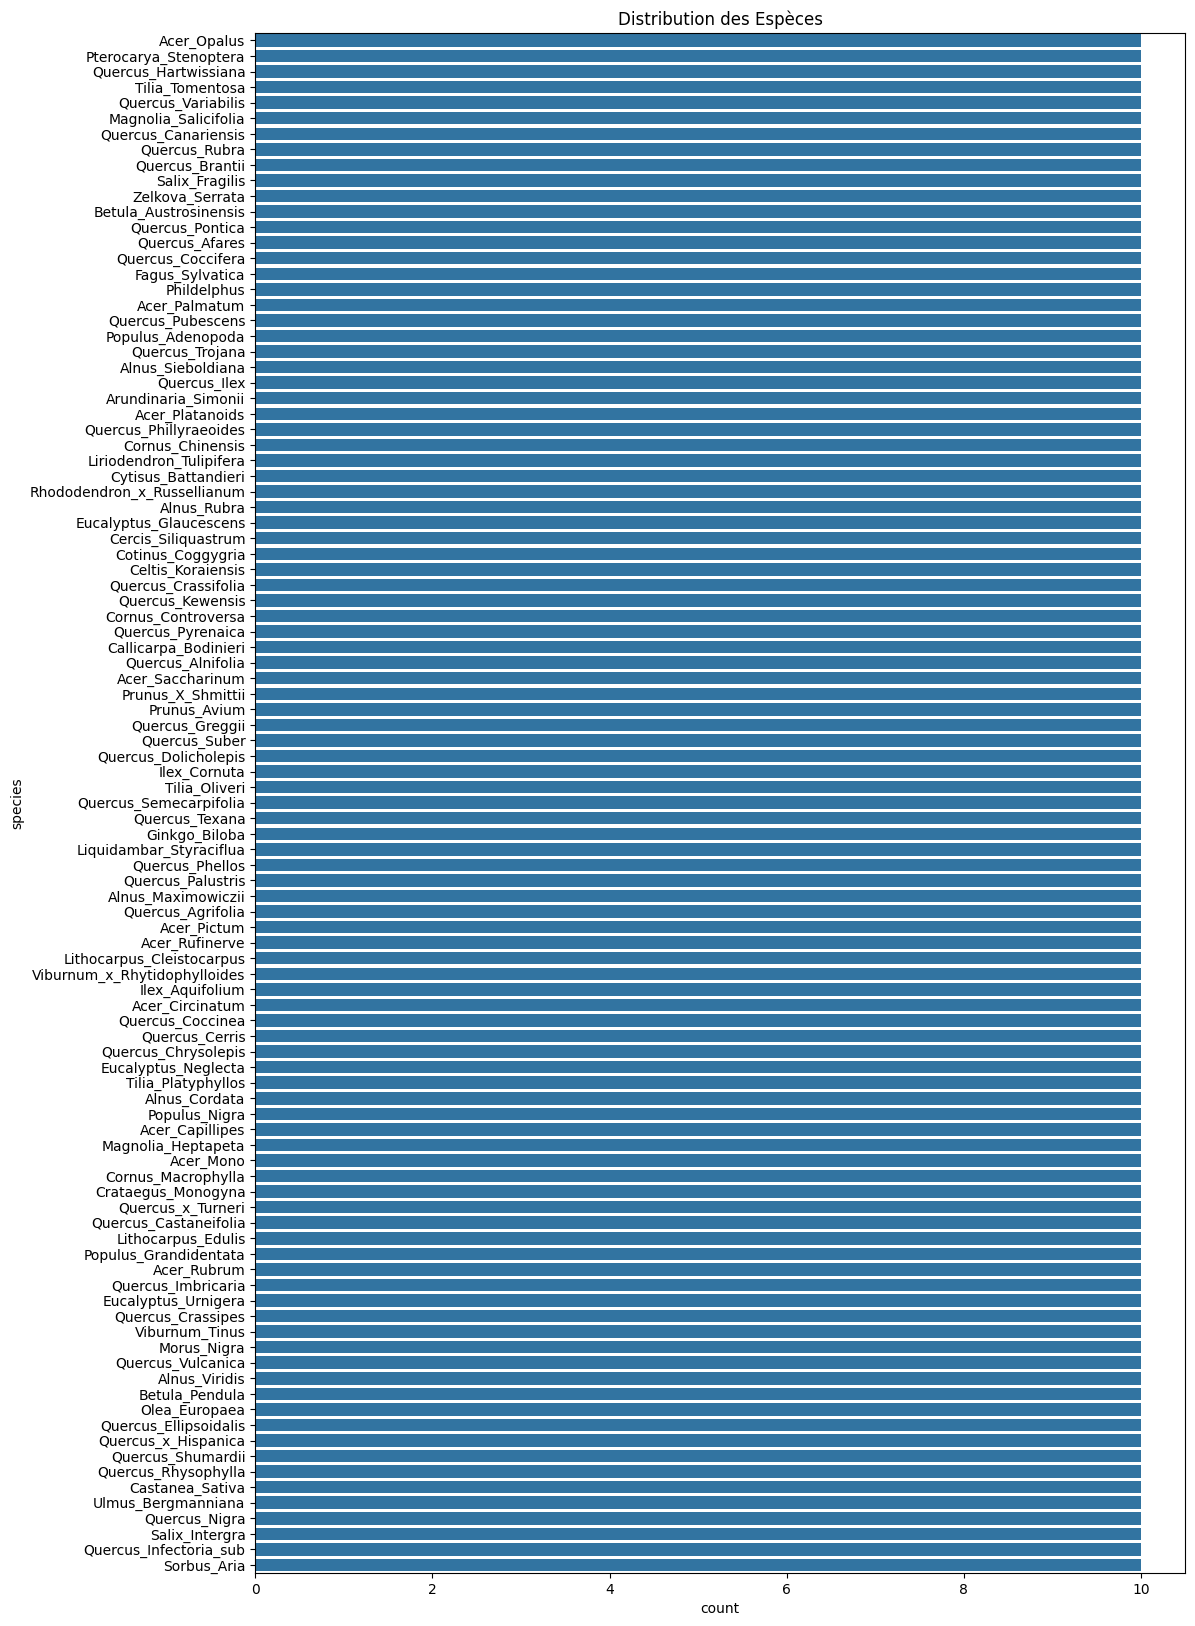

In [26]:
plt.figure(figsize=(12, 20))  # Augmentez la hauteur pour mieux afficher les étiquettes
sns.countplot(y='species', data=train_data)
plt.title('Distribution des Espèces')
plt.show()

### Analyse des surclasses

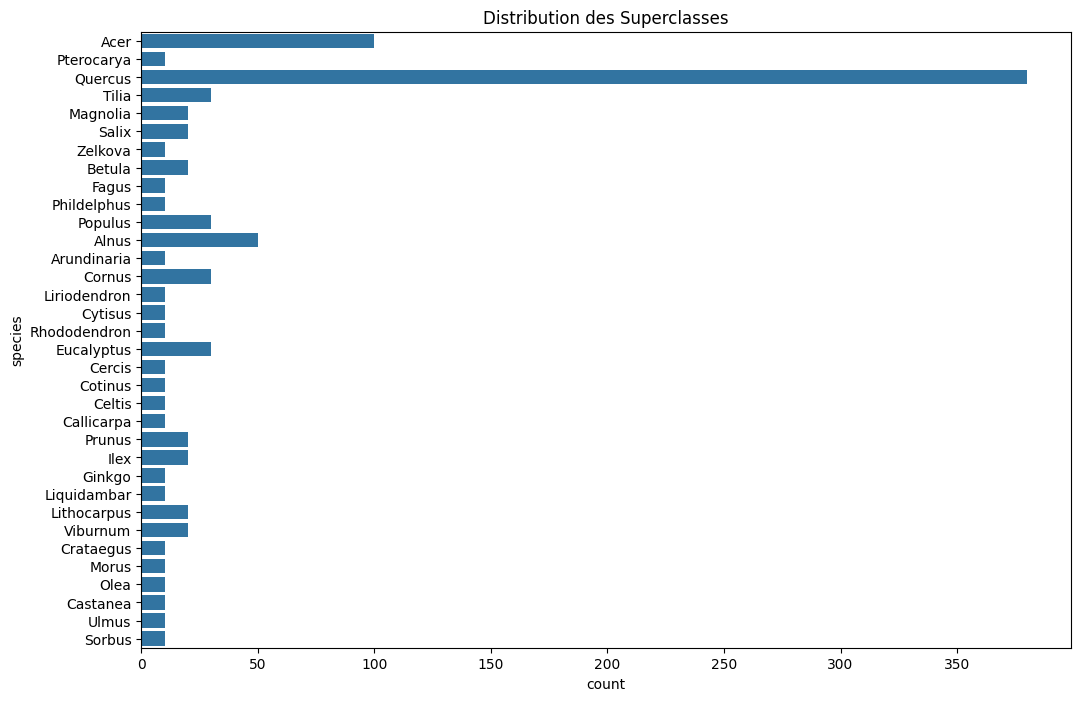

In [32]:
plt.figure(figsize=(12, 8))  # Augmentez la hauteur pour mieux afficher les étiquettes
sns.countplot(y='species', data=super_train_data)
plt.title('Distribution des Superclasses')
plt.show()

In [71]:
# Identifier les colonnes pour chaque groupe
margin_cols = [col for col in train_data.columns if 'margin' in col]
shape_cols = [col for col in train_data.columns if 'shape' in col]
texture_cols = [col for col in train_data.columns if 'texture' in col]

median_margin = train_data[margin_cols].median(axis=1)
median_shape = train_data[shape_cols].median(axis=1)
median_texture = train_data[texture_cols].median(axis=1)


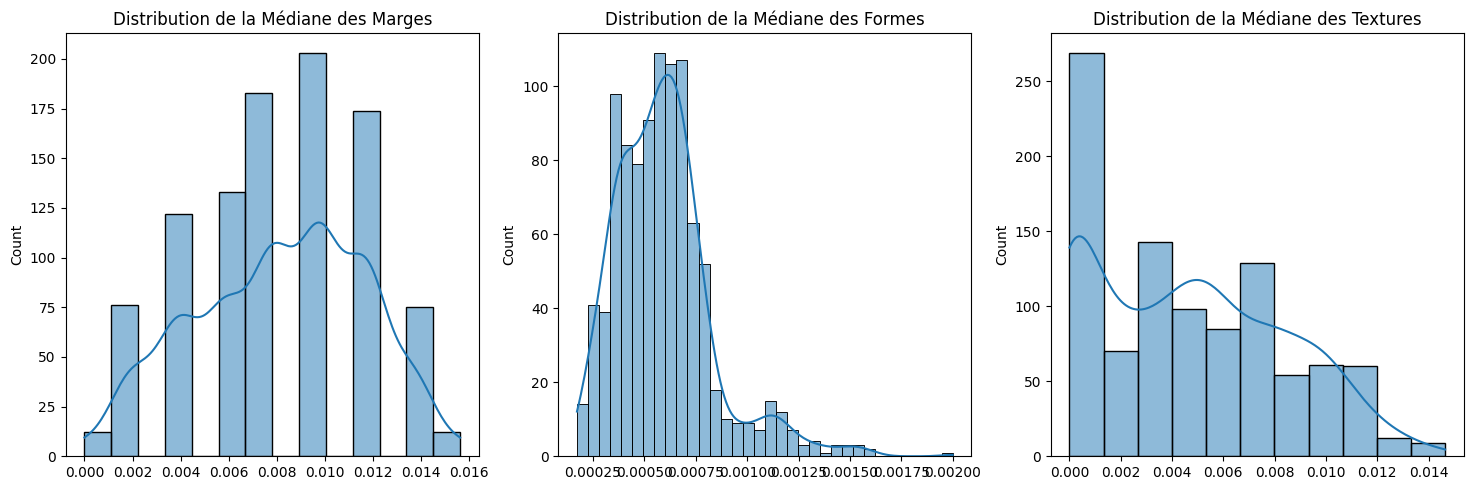

In [72]:
# Histogrammes des médianes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(median_margin, kde=True)
plt.title('Distribution de la Médiane des Marges')

plt.subplot(1, 3, 2)
sns.histplot(median_shape, kde=True)
plt.title('Distribution de la Médiane des Formes')

plt.subplot(1, 3, 3)
sns.histplot(median_texture, kde=True)
plt.title('Distribution de la Médiane des Textures')

plt.tight_layout()
plt.show()

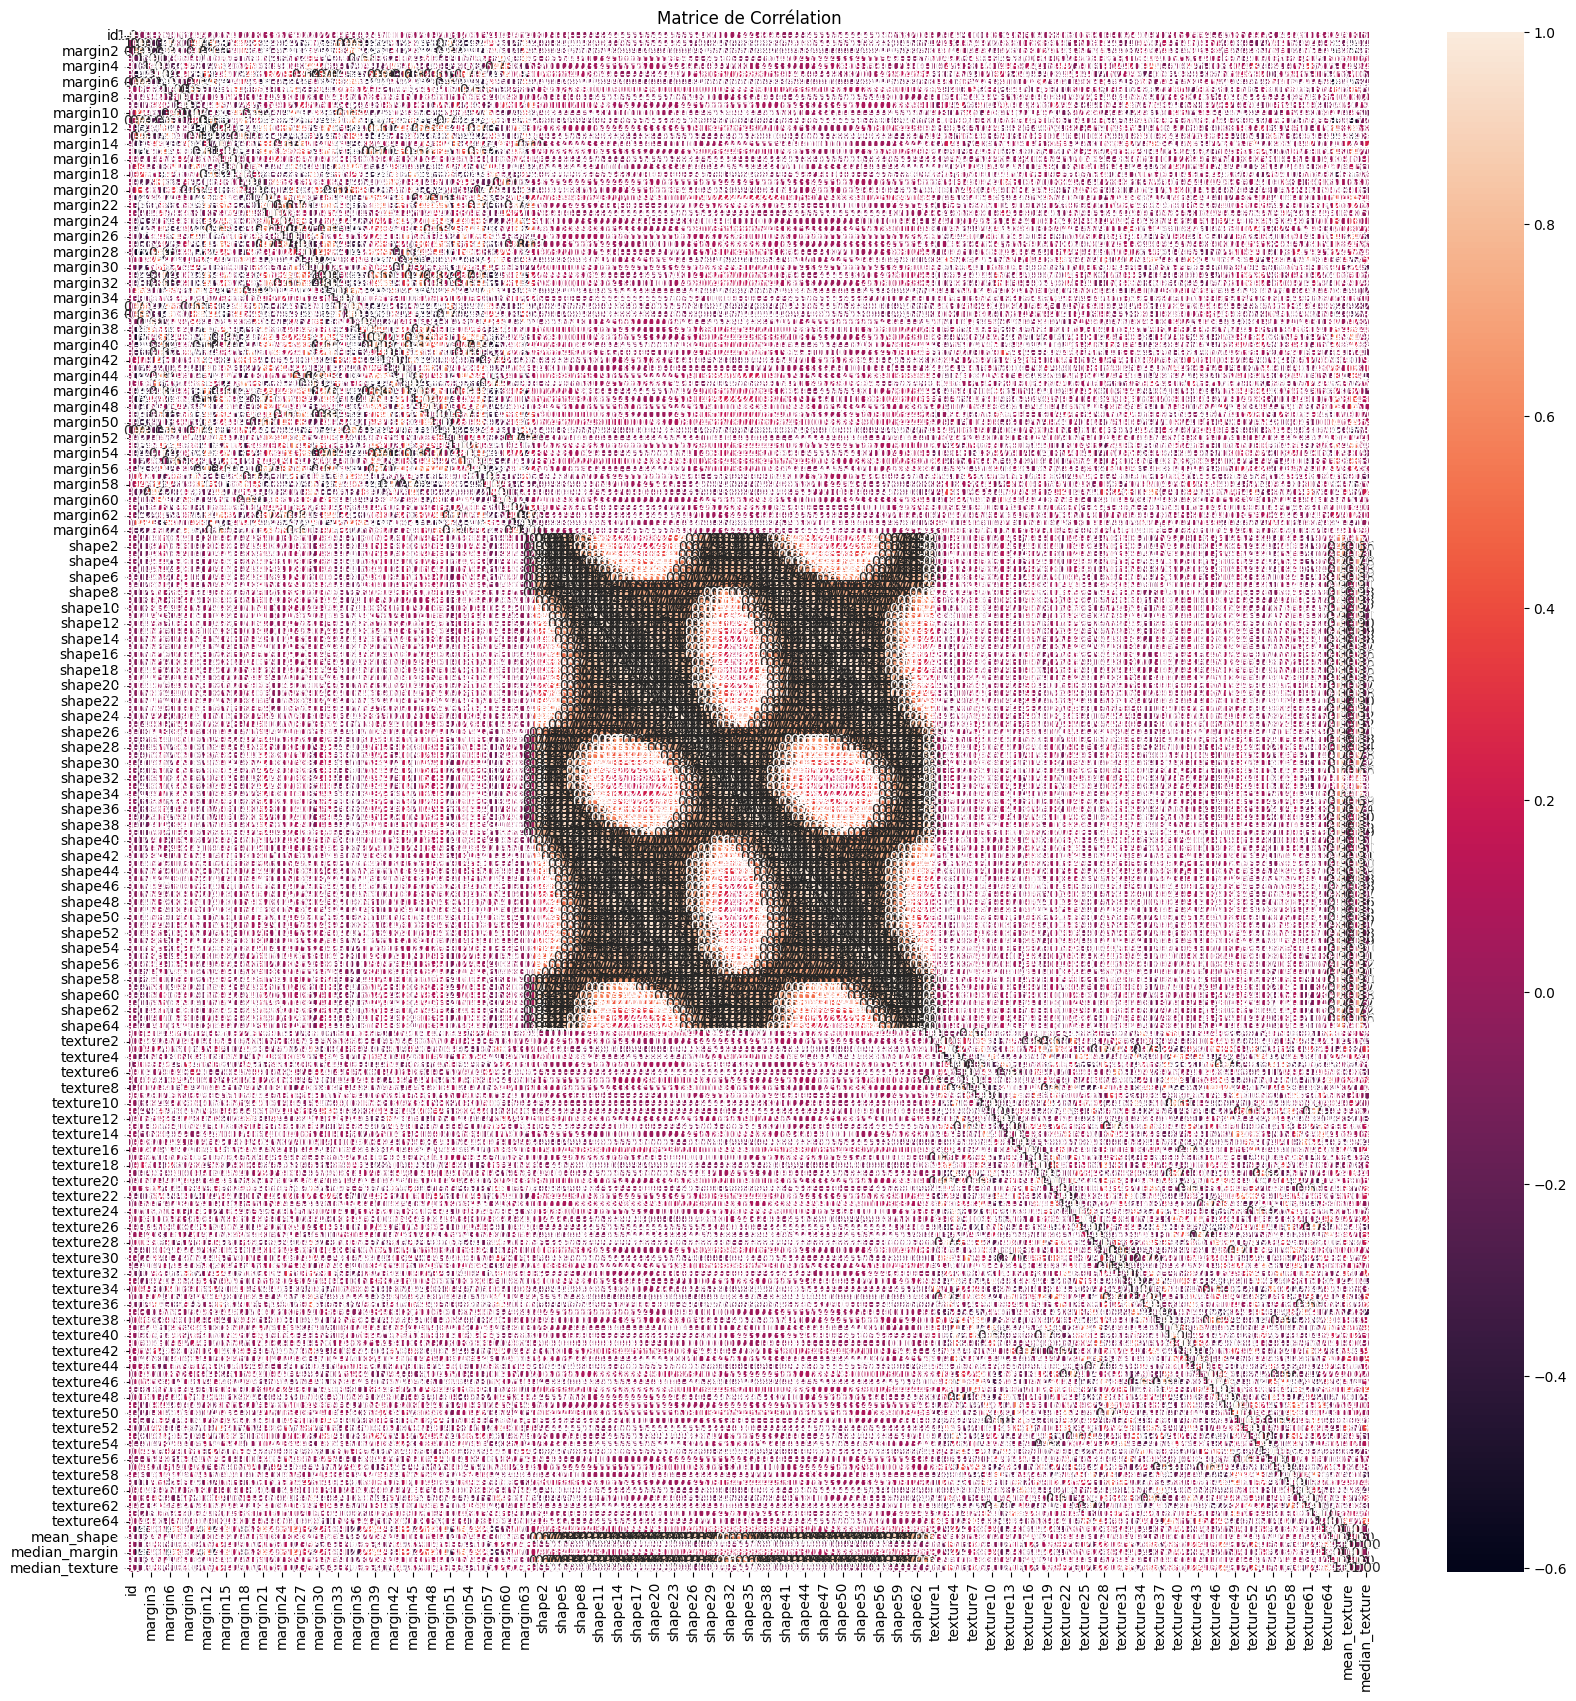

In [48]:
# Supprimer les colonnes non numériques
numeric_data = train_data.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr_matrix = numeric_data.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


### Normalisation des données

#### Z-Score

In [91]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Sélectionner les colonnes numériques à normaliser
numeric_columns = [col for col in train_data.columns if col not in ['id', 'species']]
numeric_data_without_id_species = train_data[numeric_columns]

# Ajuster et transformer les données
normalized_data_z_score = scaler.fit_transform(numeric_data_without_id_species)

# Créer un DataFrame avec les données normalisées
normalized_data_z_score = pd.DataFrame(normalized_data_z_score, columns=numeric_columns)

# Ajouter les colonnes 'id' et 'species' au DataFrame normalisé
normalized_data_z_score[['id', 'species']] = train_data[['id', 'species']]

normalized_data_z_score = normalized_data_z_score[['id', 'species'] + numeric_columns]

normalized_data_z_score.head(10)

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus -0.486611 -0.131357 -0.330956 -0.682244   
1   2  Pterocarya_Stenoptera -0.585602 -0.734880 -0.028561 -0.269558   
2   3   Quercus_Hartwissiana -0.585602 -0.483408 -0.482192 -0.544694   
3   5        Tilia_Tomentosa -0.882575 -0.634302 -0.330956 -0.613469   
4   6     Quercus_Variabilis -0.585602 -0.634302  0.651866 -0.475883   
5   8   Magnolia_Salicifolia  2.681310  1.679162  0.047038 -0.751019   
6  10    Quercus_Canariensis  0.206378  0.069800 -0.557791 -0.475883   
7  11          Quercus_Rubra -0.882575 -0.734880  0.198235  0.968464   
8  14        Quercus_Brantii -0.585602 -0.684591  0.047038 -0.269558   
9  15         Salix_Fragilis -0.882575 -0.734880 -0.860185  0.487003   

    margin5   margin6   margin7   margin8  ...  texture55  texture56  \
0 -0.138444 -0.554066  0.465218 -0.395064  ...  -0.452710  -0.260149   
1  0.605389 -0.704306  0.018812 -0.395064  ...  -0.560567  -0.260149   
2 -0.563515 -0.629196  2.808662 -0.395064  ...   1.858873  -0.260149   
3  0.392826 -0.366289  0.242044 -0.395064  ...  -0.575984  -0.209558   
4 -0.032190 -0.441400 -0.762355 -0.395064  ...   0.949628  -0.260149   
5 -0.776023  2.187571 -0.650767 -0.395064  ...   1.720166  -0.260149   
6 -0.669769  0.084414  1.134741 -0.395064  ...   0.780119  -0.260149   
7 -0.563515 -0.741862 -0.873942 -0.395064  ...   0.025014   1.054663   
8 -0.669769 -0.741862  0.242044 -0.395064  ...  -0.575984  -0.260149   
9  3.155651 -0.741862 -1.097116 -0.395064  ...  -0.575984  -0.260149   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0  -0.560872  -0.345848   1.242752  -0.233151  -0.235610  -0.394871   
1  -0.687151  -0.423884   0.478218  -0.233151  -0.235610  -0.494974   
2  -0.434636  -0.423884  -0.541291  -0.233151  -0.235610  -0.520012   
3  -0.687151  -0.462921   0.287052  -0.233151  -0.235610  -0.069525   
4   0.238782  -0.462921  -1.050981  -0.233151  -0.235610  -0.520012   
5   1.122652  -0.462921  -0.668714  -0.233151  -0.235610  -0.520012   
6   1.038480  -0.462921  -0.413804  -0.233151  -0.235610  -0.520012   
7  -0.266249  -0.345848   0.350730  -0.233151   3.017059  -0.344820   
8  -0.308356  -0.462921   0.095886  -0.233151  -0.235610  -0.494974   
9  -0.687151   2.346503  -0.158959   2.966760  -0.235610   1.382064   

   texture63  texture64  
0  -0.652143   0.262397  
1   2.181670   0.133641  
2   0.835641  -0.724631  
3  -0.652143   1.249425  
4  -0.652143   0.519866  
5  -0.510460  -0.252584  
6   2.181670  -0.681742  
7  -0.439582   0.734445  
8   1.756620   2.408099  
9  -0.652143  -0.853387  

[10 rows x 194 columns]

In [92]:
# Save the filtered data to a new CSV file with
filename = f"../data/processed/data_normalisee.csv"
normalized_data_z_score.to_csv(filename, index=False)

### Detection des outliers

In [97]:
# Créer et ajuster le modèle
iso_forest = IsolationForest(contamination=0.01)  # 1% des données considérées comme outliers
iso_forest.fit(numeric_data)

# Prédictions
outliers_iso_forest = iso_forest.predict(numeric_data)

# Identifier les lignes qui sont des outliers
outlier_rows = np.where(outliers_iso_forest == -1)

In [98]:
# Calculate the percentage of outliers
outlier_percentage = len(outlier_rows[0]) / len(train_data) * 100

# Remove outlier rows
filtered_data = train_data.drop(outlier_rows[0])

# Save the filtered data to a new CSV file with the percentage in the name
filename = f"../data/processed/data_no_outliers_{outlier_percentage:.0f}%.csv"
filtered_data.to_csv(filename, index=False)

In [99]:
normalized_data_without_outliers = normalized_data_z_score.drop(outlier_rows[0])

# Write to CSV
normalized_data_without_outliers.to_csv('../data/processed/data_without_outliers_and_normalized.csv', index=False)

### ACP

In [135]:
def pca(n_components):
    # Initialize PCA with the desired number of components
    pca = PCA(n_components)

    # Fit and transform the data
    pca_data = pca.fit_transform(numeric_data)

    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

    # Add the 'id' and 'species' columns to the PCA DataFrame
    pca_df[['id', 'species']] = train_data[['id', 'species']]

    # Reorder the columns
    pca_df = pca_df[['id', 'species'] + [f'PC{i+1}' for i in range(n_components)]]

    # Write to CSV
    pca_df.to_csv('../data/processed/data_pca.csv', index=False)
    
    return pca_df